In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("smart_home_energy_consumption_large.csv")


In [3]:
df

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5
...,...,...,...,...,...,...,...,...
99995,124,Microwave,0.42,09:56,2023-09-28,20.5,Summer,1
99996,184,Computer,0.71,12:48,2023-05-27,-5.4,Spring,2
99997,101,Dishwasher,0.25,05:45,2023-02-18,35.6,Winter,3
99998,423,Air Conditioning,2.69,12:39,2023-04-20,3.7,Spring,1


In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB
None
   Home ID Appliance Type  Energy Consumption (kWh)   Time        Date  \
0       94         Fridge                      0.20  21:12  2023-12-02   
1      435           Oven                      0.23  20:11  2023-08-06   
2      466     Dishwasher                 

In [5]:
# Remove empty cells
df = df.dropna()

# Check for duplicates
df = df.drop_duplicates()

# Display updated dataset info
print("Cleaned Dataset Info:")
print(df.info())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB
None


In [6]:
print(df.isnull().sum())
df=df.dropna()

Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64


In [7]:
print("Number of duplicates:",df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicates: 0


In [8]:
df.describe()

,Home ID,Energy Consumption (kWh),Outdoor Temperature (°C),Household Size
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,1.499952,14.950135,3.001770
std,144.435367,1.181176,14.438755,1.417077
min,1.000000,0.100000,-10.000000,1.000000
25%,125.000000,0.590000,2.400000,2.000000
50%,250.000000,1.230000,14.900000,3.000000
75%,375.000000,1.870000,27.400000,4.000000
max,500.000000,5.000000,40.000000,5.000000


In [9]:
print(df.dtypes)

Home ID                       int64
Appliance Type               object
Energy Consumption (kWh)    float64
Time                         object
Date                         object
Outdoor Temperature (°C)    float64
Season                       object
Household Size                int64
dtype: object


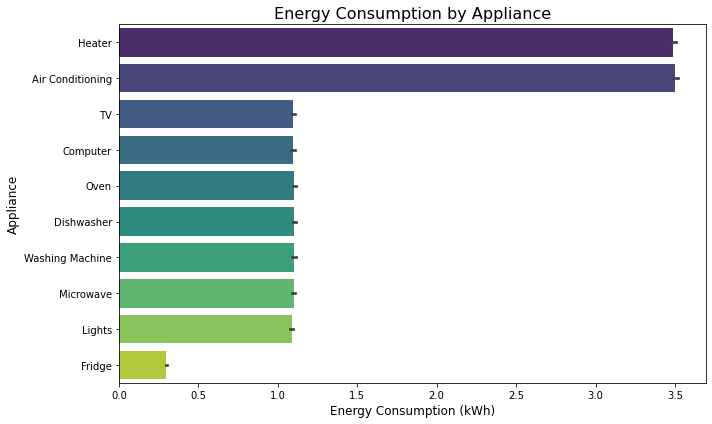

In [10]:
#Energy consumption vs appliances
# Sort data 
df = df.sort_values(by='Energy Consumption (kWh)', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Energy Consumption (kWh)', y='Appliance Type', data=df, palette='viridis')
plt.xlabel('Energy Consumption (kWh)', fontsize=12)
plt.ylabel('Appliance', fontsize=12)
plt.title('Energy Consumption by Appliance', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

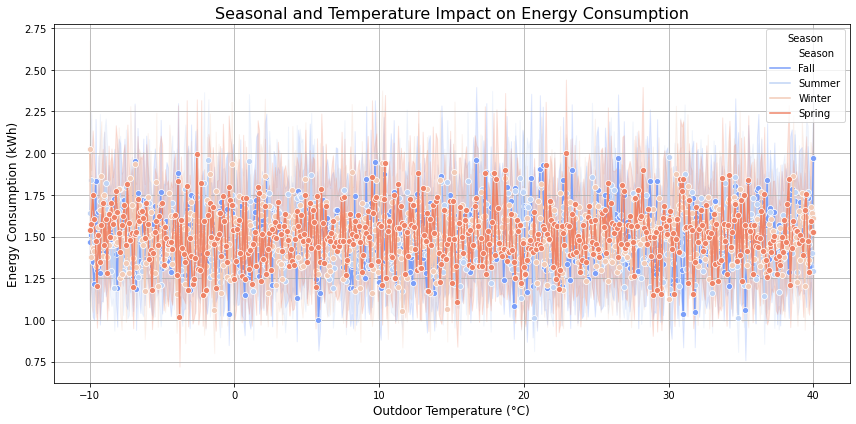

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Outdoor Temperature (°C)', y='Energy Consumption (kWh)', hue='Season', marker='o', palette='coolwarm', data=df)

# Add labels and title
plt.title('Seasonal and Temperature Impact on Energy Consumption', fontsize=16)
plt.xlabel('Outdoor Temperature (°C)', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.legend(title='Season', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


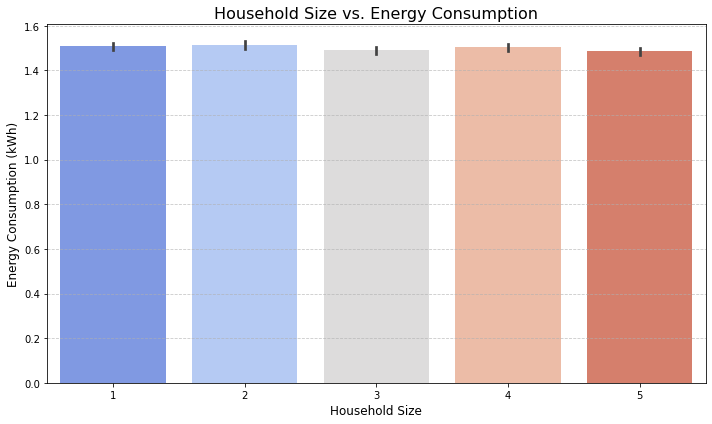

In [22]:
# Plot household size vs. energy consumption
plt.figure(figsize=(10, 6))
sns.barplot(x='Household Size', y='Energy Consumption (kWh)', palette='coolwarm', data=df)
plt.title('Household Size vs. Energy Consumption', fontsize=16)
plt.xlabel('Household Size', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

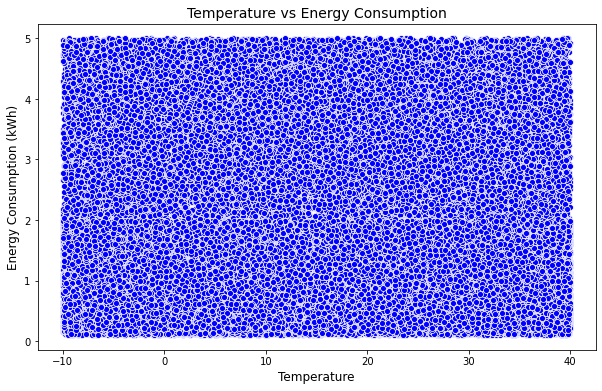

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outdoor Temperature (°C)', y='Energy Consumption (kWh)', data=df, color='blue')
plt.title('Temperature vs Energy Consumption', fontsize=14)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.show()

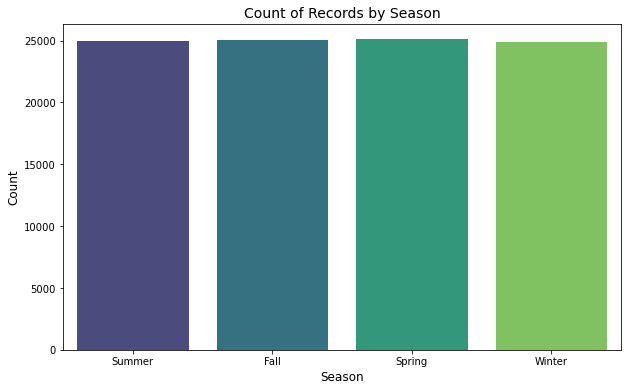

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df, palette='viridis')
plt.title('Count of Records by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

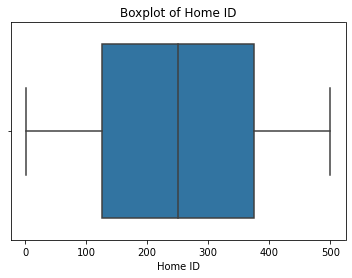

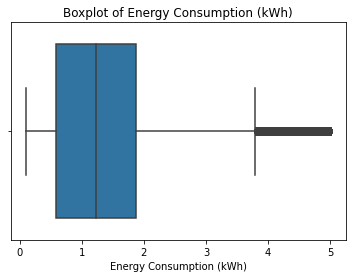

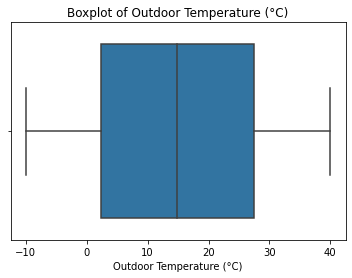

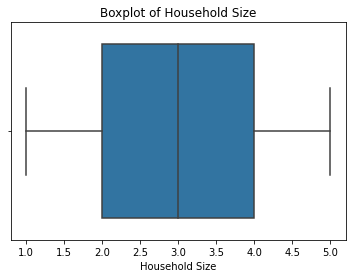

In [26]:
# Boxplot for each numeric column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [27]:
Q1 = df['Energy Consumption (kWh)'].quantile(0.25)
Q3 = df['Energy Consumption (kWh)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Energy Consumption (kWh)'] < lower_bound) | (df['Energy Consumption (kWh)'] > upper_bound)]
df['Energy Consumption (kWh)'] = df['Energy Consumption (kWh)'].clip(lower=lower_bound, upper=upper_bound)

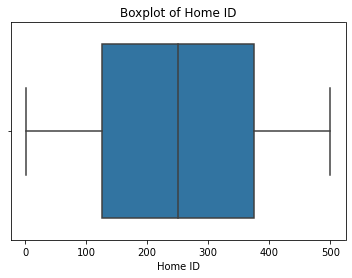

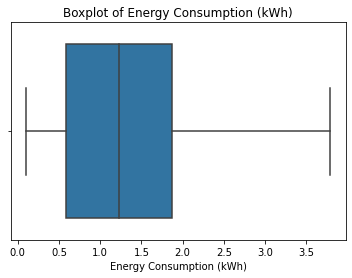

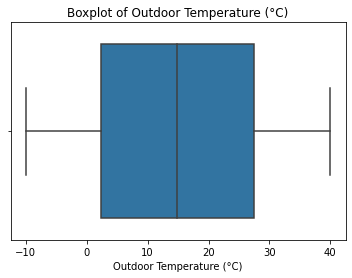

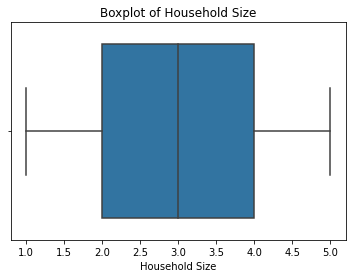

In [28]:
# Boxplot after handeling outlier in energy consumption
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

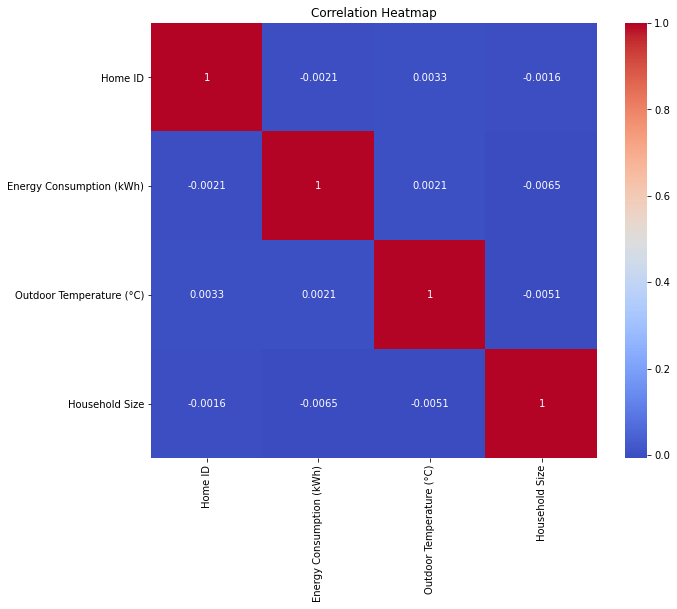

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

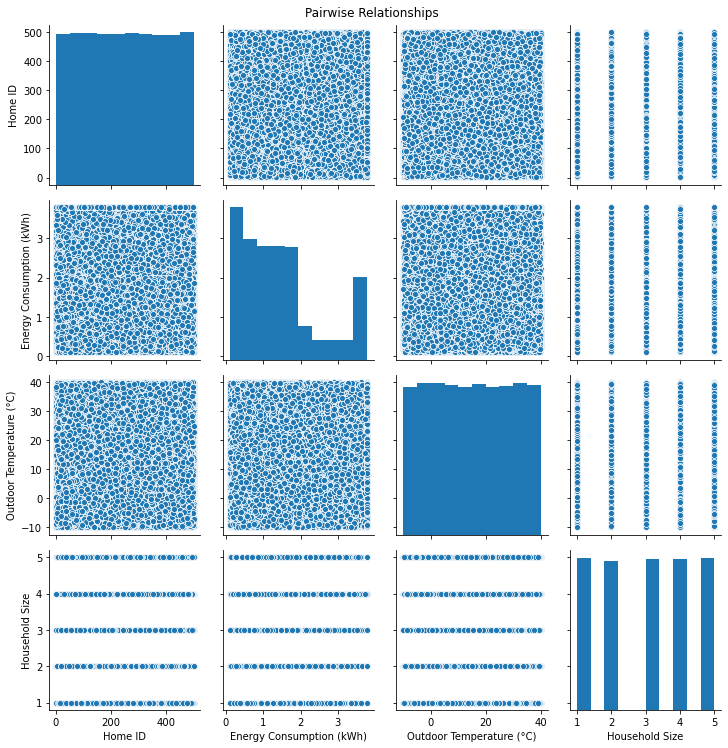

In [30]:
sns.pairplot(numeric_df)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [31]:
# Feature selection based on correlation threshold
correlation_matrix = numeric_df.corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Correlation threshold
            correlated_features.add(correlation_matrix.columns[i])
            
# Drop highly correlated features
df = df.drop(columns=correlated_features)
print(f"Remaining features: {df.columns}")

# Convert 'Date' to datetime
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Combine 'Date' and 'Time' into a single 'timestamp' column
#df['timestamp'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], errors='coerce')

# Encode categorical columns
categorical_columns = ['Appliance Type', 'Season']
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

Remaining features: Index(['Home ID', 'Appliance Type', 'Energy Consumption (kWh)', 'Time', 'Date',
       'Outdoor Temperature (°C)', 'Season', 'Household Size'],
      dtype='object')


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [41]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date_as_float'] = df['Date'].astype('int64') / 1e9
# Define features (X) and target (y)
X = df.drop(columns=['Energy Consumption (kWh)','Time','Date'])
y = df['Energy Consumption (kWh)']
print("Feature columns (X):", X.columns.tolist())
print("Target column (y):", y.name)
print("X shape:", X.shape)
print("y shape:", y.shape)

Feature columns (X): ['Home ID', 'Appliance Type', 'Outdoor Temperature (°C)', 'Season', 'Household Size', 'Date_as_float']
Target column (y): Energy Consumption (kWh)
X shape: (100000, 6)
y shape: (100000,)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
# Train a Random Forest with hyperparameter tuning
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, min_samples_split=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [44]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean()}")

Cross-Validation R2 Scores: [0.77084717 0.76839811 0.76208868 0.77164096 0.76875338]
Mean CV R2 Score: 0.7683456592963118


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Manually calculate the RMSE
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.26
Root Mean Squared Error: 0.51
Mean Absolute Error: 0.43
R-squared Score: 0.77


In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  
svr.fit(X_train, y_train)

# Make predictions
predictions = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.85
Root Mean Squared Error: 0.92
Mean Absolute Error: 0.66
R-squared Score: 0.25


In [47]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

#calculate other metrics like MAE, MSE, RMSE, R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}") 


Mean Absolute Error (MAE): 0.44
Mean Squared Error (MSE): 0.27
Root Mean Squared Error (RMSE): 0.52
R-squared: 0.76
